In [14]:
import urllib.request
from bs4 import BeautifulSoup as bs
import locale
import re
import pandas as pd
import matplotlib as plt
%matplotlib inline 

In [24]:
url = "https://www.youtube.com/user/DEN777NYC/videos"
response = urllib.request.urlopen(url)
html_cont = response.read()
soup = bs(html_cont,'html.parser',from_encoding = "UTF-8")
print(soup.prettify())

<!DOCTYPE html>
<html data-cast-api-enabled="true" lang="et-EE">
 <head>
  <style name="www-roboto">
   @font-face{font-family:'Roboto';font-style:normal;font-weight:500;src:local('Roboto Medium'),local('Roboto-Medium'),url(//fonts.gstatic.com/s/roboto/v18/KFOlCnqEu92Fr1MmEU9fChc9.ttf)format('truetype');}@font-face{font-family:'Roboto';font-style:normal;font-weight:400;src:local('Roboto Regular'),local('Roboto-Regular'),url(//fonts.gstatic.com/s/roboto/v18/KFOmCnqEu92Fr1Mu7GxP.ttf)format('truetype');}@font-face{font-family:'Roboto';font-style:italic;font-weight:500;src:local('Roboto Medium Italic'),local('Roboto-MediumItalic'),url(//fonts.gstatic.com/s/roboto/v18/KFOjCnqEu92Fr1Mu51S7ACc0CsE.ttf)format('truetype');}@font-face{font-family:'Roboto';font-style:italic;font-weight:400;src:local('Roboto Italic'),local('Roboto-Italic'),url(//fonts.gstatic.com/s/roboto/v18/KFOkCnqEu92Fr1Mu51xGIzc.ttf)format('truetype');}
  </style>
  <script name="www-roboto">
   if (document.fonts && document.

In [25]:
viewlist = []
infos = soup.find_all("ul" ,class_="yt-lockup-meta-info")
import locale
locale.setlocale(locale.LC_ALL,"en_us.UTF-8")
for info in infos: 
    temp =  re.findall("((\d+,)+\d+)$", info.li.text)[0][0] 
    temp2num = locale.atoi(temp)
    viewlist.append(temp2num)
viewseries =  pd.Series(viewlist)
channelInfo = pd.DataFrame(viewseries,columns=["View"])
channelInfo.head(5)

IndexError: list index out of range

In [4]:
channelInfo.describe()

,View
count,3.000000e+01
mean,6.559642e+05
std,2.360924e+05
min,4.489540e+05
25%,4.985680e+05
50%,6.051985e+05
75%,7.073570e+05
max,1.500003e+06


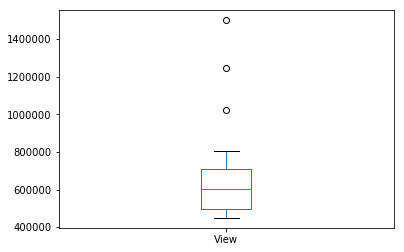

In [5]:
channelInfo.plot.box()

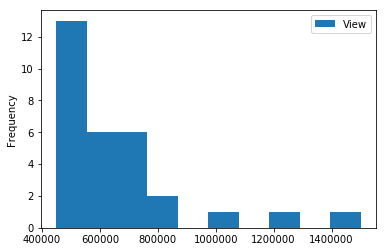

In [6]:
channelInfo.plot.hist()

In [18]:
titleList = []
timeList=[]
urlList=[]
infos = soup.find_all("h3" ,class_="yt-lockup-title")
for info in infos:
    titleList.append(info.a["title"])
    urlList.append(re.findall(r"\?v=(.{11})",info.a["href"])[0])
    m =  int(re.findall("(\d+) 分鐘",info.span.text)[0]) if len(re.findall("(\d+) 分鐘",info.span.text))>0 else 0
    s =  int(re.findall("(\d+) 秒",info.span.text)[0]) if len(re.findall("(\d+) 秒",info.span.text))>0 else 0
    timeList.append(m*60+s)
titleSeries = pd.Series(titleList)
#titleSeries.head()
timeSeries = pd.Series(timeList)
urlSeries = pd.Series(urlList)
#timeSeries.head()
channelInfo["Title"]=titleSeries
channelInfo["Time"]=timeSeries
channelInfo["url"]=urlSeries
channelInfo.head(30)

NameError: name 'channelInfo' is not defined

In [8]:
channelInfo.to_csv("Output.csv",encoding='utf-8')